In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(42)
data_x = np.linspace(-10.0, 10.0, 100)[:, np.newaxis]
# data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_y = 29*data_x + 20* np.random.randn(100, 1)  # creating your data
data_x /= np.max(data_x) #scaling
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [13]:
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x # horizontal stacking because y_hat = theta1*x1 + theta0*x0 => here taking x0 = 1

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [14]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(order)
print (test_x.shape, train_x.size, test_y.size, train_y.size)
print (test_x)

[30 56 13 41  7 20 95  3 48 14 79 12 59 26 34 89 39 60 84 63 45 73 64 40
 71 49 83 42  9 29 22 97 24 27 65 75 17 72  6 68 46 44 66 25 74 35 19 81
 28 76 86 99 32 15 47 10 21  5 33 85  4 93 37 62 16 80 54 67 70 69 90 94
 52 77 18  0 53 92 82 91 55  2  1 38 11 88 57 98 51 87 31 58 78 23 43 50
 96 36 61  8]
(20, 2) 160 20 80
[[ 1.         -0.39393939]
 [ 1.          0.13131313]
 [ 1.         -0.73737374]
 [ 1.         -0.17171717]
 [ 1.         -0.85858586]
 [ 1.         -0.5959596 ]
 [ 1.          0.91919192]
 [ 1.         -0.93939394]
 [ 1.         -0.03030303]
 [ 1.         -0.71717172]
 [ 1.          0.5959596 ]
 [ 1.         -0.75757576]
 [ 1.          0.19191919]
 [ 1.         -0.47474747]
 [ 1.         -0.31313131]
 [ 1.          0.7979798 ]
 [ 1.         -0.21212121]
 [ 1.          0.21212121]
 [ 1.          0.6969697 ]
 [ 1.          0.27272727]]


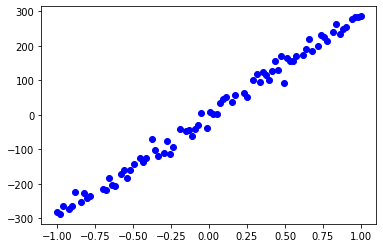

In [15]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [16]:
def get_gradient(w, x, y):
    y_estimate = (np.power(x,1).dot(w)).flatten() #hypothesis
    error = (y_estimate - y.flatten()) 
    mse = (1.0/len(x))*np.sum(np.power(error,2)) # mse
    gradient = (1.0/len(x)) * error.dot(np.power(x,1))         # gradient
    return gradient, mse

In [27]:
w = np.random.randn(2) # Random Intialization
alpha = 0.1 # learning rate
tolerance = 1e-3 # param for stopping the loop
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
-1.8865280457856384 0.4181185219555865
Iteration: 10 - Error: 16269.5458
Updated Weights : 77.582013 , 3.892428
Iteration: 20 - Error: 8270.6019
Updated Weights : 141.053024 , 3.930714
Iteration: 30 - Error: 4276.8344
Updated Weights : 185.891861 , 2.916504
Iteration: 40 - Error: 2280.2981
Updated Weights : 217.584931 , 1.836738
Iteration: 50 - Error: 1281.9001
Updated Weights : 239.992161 , 0.946923
Iteration: 60 - Error: 782.5994
Updated Weights : 255.836282 , 0.273714
Iteration: 70 - Error: 532.8936
Updated Weights : 267.040350 , -0.217671
Iteration: 80 - Error: 408.0125
Updated Weights : 274.963482 , -0.570498
Iteration: 90 - Error: 345.5578
Updated Weights : 280.566537 , -0.821867
Iteration: 100 - Error: 314.3234
Updated Weights : 284.528915 , -1.000278
Iteration: 110 - Error: 298.7026
Updated Weights : 287.331049 , -1.126673
Iteration: 120 - Error: 290.8904
Updated Weights : 289.312678 , -1.216136
Iteration: 130 - Error: 286.9834
Updated Weights : 290.71

In [22]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x^1 + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 294.071330.x^1 + -1.431112


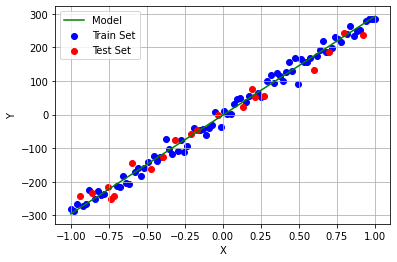

In [23]:
plt.plot(data_x[:,1], (data_x**1).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
w # trained model contains values of weights/parameters

array([ -1.43111235, 294.07132988])